In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

# Data Reading

In [2]:
df=pd.read_csv('Dataset/Google-Playstore-Cleaned.csv')

In [3]:
df2=pd.read_csv('Dataset/Google-Playstore-Cleaned2.csv')

In [4]:
df2.drop(labels= ['Unnamed: 0'],inplace=True,axis=1)

In [5]:
df2=df2[df2['Rating']<=4]


In [6]:
df2=df2.reset_index(drop=True)

In [7]:
top_categories = df2['Category'].value_counts().nlargest(9).index

In [8]:
df2['Category'] = df2['Category'].where(df2['Category'].isin(top_categories), 'Other')

In [9]:
print(top_categories)

Index(['Tools', 'Education', 'Entertainment', 'Business', 'Lifestyle',
       'Finance', 'Music & Audio', 'Personalization', 'Productivity'],
      dtype='object')


In [10]:
df2=pd.get_dummies(df2,columns=['Category'])

In [11]:
df2.head()

,App Name,Rating,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Other,Category_Personalization,Category_Productivity,Category_Tools
0,Ideal Weight Calculator,3.4,39.0,10000,0.0,3.1,4.1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Pixel Measure,4.0,45.0,1000,0.0,3.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Roller Coaster 3D,3.5,31.0,5000,0.0,55.0,4.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Panpaka Pants Blocks,3.2,59.0,10000,0.0,44.0,2.3,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,Skin Diamond for Minecraft PE,3.9,22.0,5000,0.0,9.6,4.1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df.drop(labels= ['Unnamed: 0'],inplace=True,axis=1)

In [13]:
df.head()

,App Name,Rating,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,...,Category_Books & Reference,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools
0,Hill Track Online Shopping,5.0,7.0,10,0.0,1.7,4.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Funny Santa Claus LWP,4.9,14.0,10000,0.0,19.0,5.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Haul NOW,4.2,10.0,1000,0.0,8.6,4.1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Pixel Measure,4.0,45.0,1000,0.0,3.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Niffler wallpaper HD,4.4,13.0,1000,0.0,7.7,4.1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df_combined = pd.concat([df, df2]).drop_duplicates(subset='App Name', keep='first')

In [15]:
df_combined.head()

,App Name,Rating,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other
0,Hill Track Online Shopping,5.0,7.0,10,0.0,1.7,4.0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN
1,Funny Santa Claus LWP,4.9,14.0,10000,0.0,19.0,5.0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,Haul NOW,4.2,10.0,1000,0.0,8.6,4.1,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN
3,Pixel Measure,4.0,45.0,1000,0.0,3.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4,Niffler wallpaper HD,4.4,13.0,1000,0.0,7.7,4.1,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN


In [16]:
df_combined=df_combined.fillna(0)

In [17]:
df_combined['Category_Other']= df_combined['Category_Other'].astype(int)

In [18]:
#df_combined.drop(labels= ['Unnamed: 0'],inplace=True,axis=1)

In [19]:
df_combined

,App Name,Rating,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other
0,Hill Track Online Shopping,5.0,7.0,10,0.0,1.7,4.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Funny Santa Claus LWP,4.9,14.0,10000,0.0,19.0,5.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Haul NOW,4.2,10.0,1000,0.0,8.6,4.1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Pixel Measure,4.0,45.0,1000,0.0,3.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Niffler wallpaper HD,4.4,13.0,1000,0.0,7.7,4.1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66540,Ricette per il Forno a Microonde,2.9,10.0,1000,0.0,9.2,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
66541,PAX,3.3,7.0,100,0.0,22.0,4.4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66543,Theeran Kongu Maiyam,3.6,13.0,1000,0.0,5.5,4.4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
66546,PLC webserver,3.6,24.0,1000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
import copy
bins = [ 0,2.0,3.0, 4.0 , 5.0]
#new_df=pd.read_csv("Dataset/Google-Playstore-Cleaned.csv")
new_df=copy.deepcopy(df_combined)
#new_df.drop(labels= ['Unnamed: 0'],inplace=True,axis=1)
new_df['Binned_Rating'] = pd.cut(df_combined['Rating'], bins)

In [21]:
new_df.drop(labels= ['Rating'],inplace=True,axis=1)

In [22]:
new_df

,App Name,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,...,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other,Binned_Rating
0,Hill Track Online Shopping,7.0,10,0.0,1.7,4.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"(4.0, 5.0]"
1,Funny Santa Claus LWP,14.0,10000,0.0,19.0,5.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,"(4.0, 5.0]"
2,Haul NOW,10.0,1000,0.0,8.6,4.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(4.0, 5.0]"
3,Pixel Measure,45.0,1000,0.0,3.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,"(3.0, 4.0]"
4,Niffler wallpaper HD,13.0,1000,0.0,7.7,4.1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,"(4.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66540,Ricette per il Forno a Microonde,10.0,1000,0.0,9.2,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,"(2.0, 3.0]"
66541,PAX,7.0,100,0.0,22.0,4.4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"(3.0, 4.0]"
66543,Theeran Kongu Maiyam,13.0,1000,0.0,5.5,4.4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,"(3.0, 4.0]"
66546,PLC webserver,24.0,1000,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,"(3.0, 4.0]"


# Data Pre-Processing

In [23]:
new_df.columns[26]


'Binned_Rating'

In [24]:
new_df['Binned_Rating']=new_df['Binned_Rating'].astype('str')

In [25]:
new_df['Binned_Rating'].value_counts()

(3.0, 4.0]    49446
(4.0, 5.0]    48607
(2.0, 3.0]    12689
(0.0, 2.0]     2674
Name: Binned_Rating, dtype: int64

In [26]:
ordinal_mapping = {'(0.0, 2.0]' : 0,'(2.0, 3.0]':1,'(3.0, 4.0]':2,'(4.0, 5.0]':3}
new_df['Binned_Rating'] = new_df['Binned_Rating'].map(ordinal_mapping)

In [27]:
new_df.head(20)

,App Name,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,...,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other,Binned_Rating
0,Hill Track Online Shopping,7.0,10,0.0,1.7,4.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
1,Funny Santa Claus LWP,14.0,10000,0.0,19.0,5.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
2,Haul NOW,10.0,1000,0.0,8.6,4.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,Pixel Measure,45.0,1000,0.0,3.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,Niffler wallpaper HD,13.0,1000,0.0,7.7,4.1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
5,RAM Cleaner for Android,21055.0,1000000,0.0,2.8,4.1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,3
6,Praise AG,20.0,500,0.0,4.3,4.1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
7,Teella,23.0,500,0.0,36.0,8.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
8,Glitter Heart Themes Live Wallpapers,13.0,5000,0.0,5.5,4.1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
9,Radio Masti 24x7,83.0,10000,0.0,11.0,4.1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3


In [28]:
new_df['Binned_Rating'].value_counts()

2    49446
3    48607
1    12689
0     2674
Name: Binned_Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x240a243bcd0>,
 [Text(-1.9596727614410547, 0.3996031382083882, '2'),
  Text(1.6199271358982266, -1.1729603890927303, '3'),
  Text(0.9581839964950405, 1.7555293870684117, '1'),
  Text(0.14800258313083392, 1.9945162910807726, '0')],
 [Text(-1.4697545710807909, 0.29970235365629116, '44%'),
  Text(1.21494535192367, -0.8797202918195475, '43%'),
  Text(0.7186379973712804, 1.3166470403013086, '11%'),
  Text(0.11100193734812544, 1.4958872183105794, '2%')])

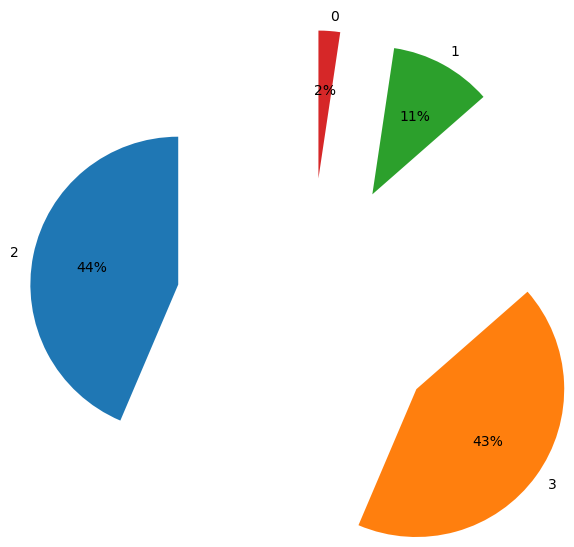

In [29]:
explode=(0.9,0.9,0.9,0.9)
plt.pie(new_df['Binned_Rating'].value_counts(), labels=new_df['Binned_Rating'].value_counts().index, autopct='%1.0f%%', startangle=90,explode=explode)

In [30]:
new_df

,App Name,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,...,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other,Binned_Rating
0,Hill Track Online Shopping,7.0,10,0.0,1.7,4.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
1,Funny Santa Claus LWP,14.0,10000,0.0,19.0,5.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
2,Haul NOW,10.0,1000,0.0,8.6,4.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,Pixel Measure,45.0,1000,0.0,3.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,Niffler wallpaper HD,13.0,1000,0.0,7.7,4.1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66540,Ricette per il Forno a Microonde,10.0,1000,0.0,9.2,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
66541,PAX,7.0,100,0.0,22.0,4.4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
66543,Theeran Kongu Maiyam,13.0,1000,0.0,5.5,4.4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
66546,PLC webserver,24.0,1000,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2


In [31]:
new_df.columns[25]

'Category_Other'

In [32]:
new_df.columns[1:26]

Index(['Rating Count', 'Minimum Installs', 'Price', 'Size', 'Minimum Android',
       'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Days Since Last Updated',
       'Category_Books & Reference', 'Category_Business', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Lifestyle',
       'Category_Music & Audio', 'Category_Personalization',
       'Category_Productivity', 'Category_Tools', 'Category_Other'],
      dtype='object')

In [33]:
features = new_df.columns[1:26]
labels = new_df.columns[26]
X = new_df.loc[:,features]



y = new_df.loc[:,labels]

In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'data' contains both features and labels
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)

In [35]:
x_train

,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,Content Rating_Everyone,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other
41038,7.0,10000,0.0,22.0,4.1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29596,927.0,100000,0.0,0.0,1.5,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10831,27.0,5000,0.0,13.0,5.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
43484,23.0,5000,0.0,5.3,2.3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
65926,453.0,50000,0.0,1.9,2.1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38501,146.0,50000,0.0,1.8,2.3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2704,6.0,500,0.0,4.0,4.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68144,416.0,100000,0.0,7.9,4.1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54032,35.0,5000,0.0,7.1,4.4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
x_train.columns

Index(['Rating Count', 'Minimum Installs', 'Price', 'Size', 'Minimum Android',
       'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Days Since Last Updated',
       'Category_Books & Reference', 'Category_Business', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Lifestyle',
       'Category_Music & Audio', 'Category_Personalization',
       'Category_Productivity', 'Category_Tools', 'Category_Other'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = x_train.columns[0:5]
new_columns_to_standardize=columns_to_standardize.append(x_train.columns[13:14])



columns_to_standardize.append(x_train.columns[13:14])
print(new_columns_to_standardize)


Index(['Rating Count', 'Minimum Installs', 'Price', 'Size', 'Minimum Android',
       'Days Since Last Updated'],
      dtype='object')


In [38]:
scaler = StandardScaler()
x_train[new_columns_to_standardize] = scaler.fit_transform(x_train[new_columns_to_standardize])

In [39]:
x_train.head()

,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,Content Rating_Everyone,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other
41038,-0.046708,-0.062356,-0.037679,0.122531,0.020050,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29596,-0.014440,-0.004364,-0.037679,-0.820699,-1.900466,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10831,-0.046007,-0.065577,-0.037679,-0.263336,0.684844,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
43484,-0.046147,-0.065577,-0.037679,-0.593466,-1.309538,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
65926,-0.031065,-0.036582,-0.037679,-0.739238,-1.457270,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [40]:
new_df.isnull().sum()

App Name                          0
Rating Count                      0
Minimum Installs                  0
Price                             0
Size                              0
Minimum Android                   0
Ad Supported                      0
In App Purchases                  0
Editors Choice                    0
Content Rating_Adults only 18+    0
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Days Since Last Updated           0
Category_Books & Reference        0
Category_Business                 0
Category_Education                0
Category_Entertainment            0
Category_Finance                  0
Category_Lifestyle                0
Category_Music & Audio            0
Category_Personalization          0
Category_Productivity             0
Category_Tools                    0
Category_Other                    0
Binned_Rating                     0
dtype: int64

In [41]:
desired_ratio = 0.5
oversampler = SVMSMOTE(random_state=42,sampling_strategy='not majority')
#combinedsampler = SMOTETomek(sampling_strategy='auto')

In [42]:
X_resampled, y_resampled = oversampler.fit_resample(x_train, y_train) # new x_train and y_train

In [43]:
print(x_train.shape)
print(X_resampled.shape)


(90732, 25)
(141388, 25)


In [44]:
X_resampled.head()

,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,Content Rating_Everyone,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Category_Other
0,-0.046708,-0.062356,-0.037679,0.122531,0.020050,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.014440,-0.004364,-0.037679,-0.820699,-1.900466,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,-0.046007,-0.065577,-0.037679,-0.263336,0.684844,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-0.046147,-0.065577,-0.037679,-0.593466,-1.309538,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,-0.031065,-0.036582,-0.037679,-0.739238,-1.457270,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Training

In [78]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer

# Grid Search

In [46]:
#from sklearn.inspection import permutation_importance
#rf_classifier = RandomForestClassifier(n_jobs=-1, n_estimators=200, min_samples_split=2, max_depth=None, class_weight=None)

# Train the model
#rf_classifier.fit(X_resampled, y_resampled)

# Calculate permutation importances
#result = permutation_importance(rf_classifier, X_resampled, y_resampled, n_repeats=10, random_state=42)
#feature_importances = result.importances_mean

# Select features based on permutation importances (e.g., keep top features above a threshold)



In [47]:
#threshold = 0.01
#top_features = X_resampled.columns[feature_importances>threshold]
#X_resampled_permuted = X_resampled[top_features]

In [48]:
#X_resampled_permuted.columns

In [104]:
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_classifier = RandomForestClassifier()
"""
param_grid = {
    'n_estimators': [200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [False],
    'n_jobs':[-1],
    'max_features': ['auto', 'sqrt', 'log2', None],
    
    
   
}

"""
param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'bootstrap': [False],
    'n_jobs':[-1],
    'max_features': ['sqrt'],
    'class_weight':['balanced_subsample']
    
   
}



# Define the scoring metric
f1_scorer = make_scorer(f1_score, average='macro')
grid_search = RandomizedSearchCV(rf_classifier, param_grid, cv=stratified_cv, scoring=f1_scorer, verbose=3)
grid_search.fit(X_resampled, y_resampled)
print(f" Best Parameters: {grid_search.best_params_}, Best F1 Score: {grid_search.best_score_}")




Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, n_jobs=-1;, score=0.783 total time= 3.0min
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, n_jobs=-1;, score=0.782 total time= 3.1min
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, n_jobs=-1;, score=0.785 total time= 4.2min
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300, n_jobs=-1;, score=0.784 total time= 3.2min
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_

In [87]:
'''
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the CatBoostClassifier
rf_classifier = CatBoostClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.2, 0.1],
    'depth': [None, 5, 7],
    'iterations': [200, 300,400],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'objective': ['MultiClass'],
    'loss_function': ['MultiClass', 'MultiClassOneVsAll'],
    'custom_loss': [ 'TotalF1','AUC', 'Accuracy'],
    'leaf_estimation_method': ['Newton', 'Gradient'],
}





# Define the scoring metric
f1_scorer = make_scorer(f1_score, average='macro')
grid_search2 = RandomizedSearchCV(rf_classifier, param_grid, cv=stratified_cv, scoring=f1_scorer, verbose=3)
grid_search2.fit(X_resampled, y_resampled)
print(f" Best Parameters: {grid_search.best_params_}, Best F1 Score: {grid_search.best_score_}")
'''


Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 1.2715386	total: 141ms	remaining: 28.1s
1:	learn: 1.1961840	total: 223ms	remaining: 22s
2:	learn: 1.1387052	total: 301ms	remaining: 19.7s
3:	learn: 1.1005105	total: 410ms	remaining: 20.1s
4:	learn: 1.0640955	total: 510ms	remaining: 19.9s
5:	learn: 1.0345474	total: 579ms	remaining: 18.7s
6:	learn: 1.0159548	total: 661ms	remaining: 18.2s
7:	learn: 0.9917538	total: 745ms	remaining: 17.9s
8:	learn: 0.9806230	total: 831ms	remaining: 17.6s
9:	learn: 0.9669841	total: 936ms	remaining: 17.8s
10:	learn: 0.9544229	total: 1.03s	remaining: 17.8s
11:	learn: 0.9458155	total: 1.12s	remaining: 17.6s
12:	learn: 0.9369477	total: 1.2s	remaining: 17.3s
13:	learn: 0.9228643	total: 1.3s	remaining: 17.3s
14:	learn: 0.9139701	total: 1.4s	remaining: 17.2s
15:	learn: 0.9051791	total: 1.47s	remaining: 16.9s
16:	learn: 0.8995565	total: 1.54s	remaining: 16.6s
17:	learn: 0.8918075	total: 1.65s	remaining: 16.7s
18:	learn: 0.8863881	total: 1.76s	re

KeyboardInterrupt: 

In [ ]:
'''
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_classifier = XGBClassifier()
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_classifier = XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.2,0.3],
    'n_estimators': [200,300],
    'max_depth': [None],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2]
}




# Define the scoring metric
f1_scorer = make_scorer(f1_score, average='macro')
grid_search = RandomizedSearchCV(rf_classifier, param_grid, cv=stratified_cv, scoring=f1_scorer, verbose=3)
grid_search.fit(X_resampled, y_resampled)
print(f" Best Parameters: {grid_search.best_params_}, Best F1 Score: {grid_search.best_score_}")

param_grid = {
    'learning_rate': [0.1, 0.2,0.3],
    'n_estimators': [200,300],
    'max_depth': [None],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2]
}




# Define the scoring metric
f1_scorer = make_scorer(f1_score, average='macro')
random_search = RandomizedSearchCV(rf_classifier, param_grid, cv=stratified_cv, scoring=f1_scorer, verbose=3)
random_search.fit(X_resampled, y_resampled)
print(f" Best Parameters: {grid_search.best_params_}, Best F1 Score: {grid_search.best_score_}")
'''

In [90]:
"""
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
from imblearn.ensemble import BalancedRandomForestClassifier
rf_classifier = BalancedRandomForestClassifier()

param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
   
}

import warnings

# Suppress only specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Your code here

# Reset the warning filter if necessary



# Define the scoring metric
f1_scorer = make_scorer(f1_score, average='macro')
grid_search = RandomizedSearchCV(rf_classifier, param_grid, cv=stratified_cv, scoring=f1_scorer, verbose=3)
grid_search.fit(X_resampled, y_resampled)
print(f" Best Parameters: {grid_search.best_params_}, Best F1 Score: {grid_search.best_score_}")
"""

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.754 total time= 2.8min


KeyboardInterrupt: 

# Metrics on Test Data

In [105]:

rf_classifier=grid_search.best_estimator_


In [106]:

rf_classifier.fit(X_resampled, y_resampled)


RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1)

In [113]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
# Define a dictionary of scorers for cross-validation
scorers = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(rf_classifier, X, y, cv=5, scoring=scorers)

# Extract mean scores
mean_precision = cv_results['test_precision'].mean()
mean_recall = cv_results['test_recall'].mean()
mean_f1_score = cv_results['test_f1_score'].mean()

# Print the results
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")

Mean Precision: 0.6318461906864783
Mean Recall: 0.6187147554442932
Mean F1 Score: 0.5807568630613896


In [119]:
import numpy as np
cv_results = cross_validate(rf_classifier, x_train, y_train, cv=5, scoring='accuracy', return_train_score=False,verbose=3)
print("Mean Accuracy:", np.mean(cv_results['test_score']))
print("Standard Deviation of Accuracy:", np.std(cv_results['test_score']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.644 total time= 1.6min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] END ......................................., score=0.646 total time= 1.9min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s


[CV] END ......................................., score=0.646 total time= 1.6min
[CV] END ......................................., score=0.644 total time= 1.3min
[CV] END ......................................., score=0.644 total time= 1.8min
Mean Accuracy: 0.6447780236947207
Standard Deviation of Accuracy: 0.0011711958753388607


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.2min finished


In [118]:
import pickle

# Assuming 'classifier' is your trained model
# Save the model to a file
with open('project_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [107]:
y_trainpred = rf_classifier.predict(X_resampled)
#y_trainpred = rf_classifier.predict(x_train)
classification_report_result = classification_report(y_resampled, y_trainpred)
#classification_report_result = classification_report(y_train, y_trainpred)
print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     22717
           1       1.00      0.97      0.98     39557
           2       0.99      0.97      0.98     39557
           3       0.95      1.00      0.98     39557

    accuracy                           0.98    141388
   macro avg       0.98      0.98      0.98    141388
weighted avg       0.98      0.98      0.98    141388



In [108]:

model=rf_classifier
y_pred=model.predict(x_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)


In [111]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       535
           1       0.13      0.05      0.07      2538
           2       0.57      0.67      0.61      9889
           3       0.64      0.66      0.65      9722

    accuracy                           0.58     22684
   macro avg       0.33      0.34      0.33     22684
weighted avg       0.53      0.58      0.55     22684



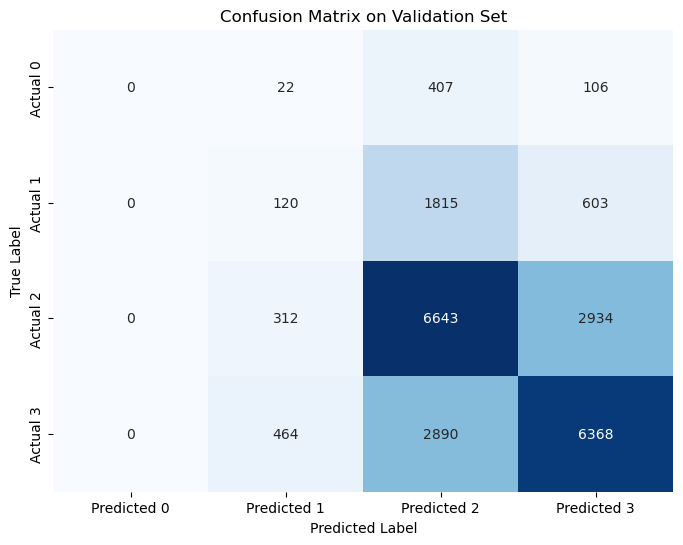

In [116]:
import seaborn as sns
# Make predictions on the validation set
y_val_pred = rf_classifier.predict(x_test)

# Calculate the confusion matrix on the validation set
cm_val = confusion_matrix(y_test, y_val_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1",'Predicted 2','Predicted 3'],
            yticklabels=["Actual 0", "Actual 1",'Actual 2','Actual 3'])
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()